In [11]:
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
from pyspark.sql.functions import year

import pandas as pd
import seaborn as sns


In [12]:

# Load Dataset
df = spark.read.csv('Datasets/worldriskindex.csv', inferSchema=True, header=True)

df2 = spark.read.csv('Datasets/prevalence.csv', inferSchema=True, header=True)

df3 = spark.read.csv('Datasets/poverty-share-on-less-than-30-per-day.csv', inferSchema=True, header=True)

df4 = spark.read.csv('Datasets/yielddf.csv', inferSchema=True, header=True)

In [ ]:
df.show()

In [ ]:
df2.show()

In [ ]:
df3.show()

In [ ]:
df4.show()

In [13]:
# Explore Data

df.describe().show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1917 entries, 0 to 1916
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Region                        1917 non-null   object 
 1   WRI                           1917 non-null   float64
 2   Exposure                      1917 non-null   float64
 3   Vulnerability                 1917 non-null   float64
 4   Susceptibility                1917 non-null   float64
 5   Lack of Coping Capabilities   1917 non-null   float64
 6    Lack of Adaptive Capacities  1916 non-null   float64
 7   Year                          1917 non-null   int64  
 8   Exposure Category             1917 non-null   object 
 9   WRI Category                  1916 non-null   object 
 10  Vulnerability Category        1913 non-null   object 
 11  Susceptibility Category       1917 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 179.8+ KB
<cl

In [ ]:
df2.describe().show()

In [ ]:
df3.describe().show()

In [ ]:
df4.describe().show()

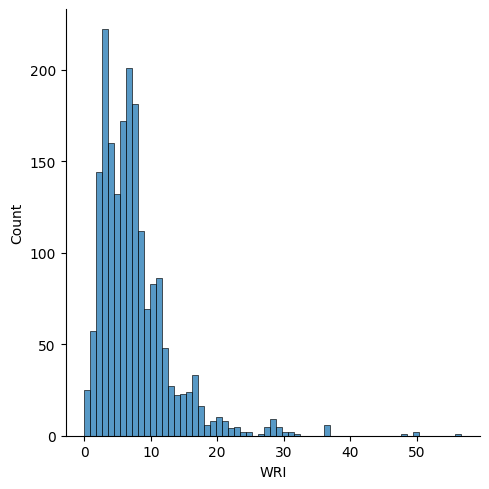

In [16]:
sns.displot(df['WRI'])


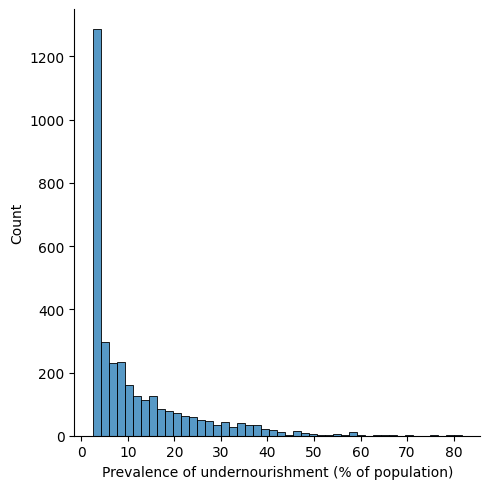

In [17]:
sns.displot(df2['Prevalence of undernourishment (% of population)'])


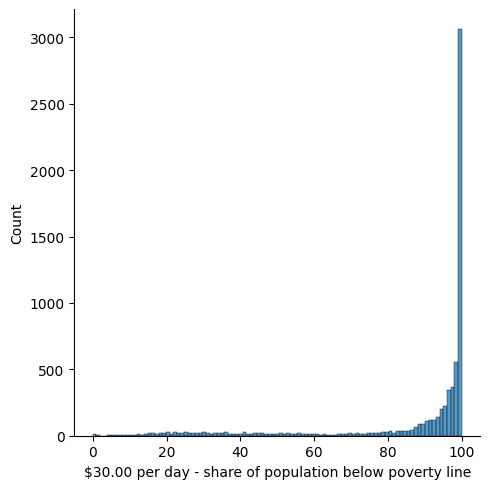

In [18]:
sns.displot(df3['$30.00 per day - share of population below poverty line'])


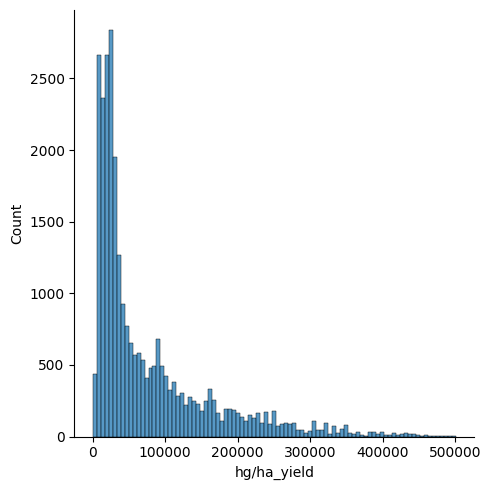

In [19]:
sns.displot(df4['hg/ha_yield'])

In [25]:
df_filtered = df[df['Year'] == 2013]
df_filtered2 = df2[df2['Year'] == 2013]
df_filtered3 = df3[df3['Year'] == 2013]
df_filtered4 = df4[df4['Year'] == 2013]

            Region    WRI  Exposure  Vulnerability  Susceptibility  \
173        Vanuatu  36.43     63.66          57.23           34.66   
174          Tonga  28.23     55.27          51.07           27.72   
175    Philippinen  27.52     52.46          52.46           33.74   
176      Guatemala  20.88     36.30          57.53           38.57   
177    Bangladesch  19.81     31.70          62.50           40.92   
..             ...    ...       ...            ...             ...   
341        Grenada   1.44      3.13          46.18           24.76   
342  Saudi-Arabien   1.32      2.93          44.83           17.73   
343       Barbados   1.16      3.46          33.40           15.20   
344          Malta   0.61      1.65          37.01           14.36   
345          Katar   0.10      0.28          36.46            9.50   

     Lack of Coping Capabilities   Lack of Adaptive Capacities  Year  \
173                        81.27                         55.77  2013   
174            

In [26]:
df_filtered.show()

,Region,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category
173,Vanuatu,36.43,63.66,57.23,34.66,81.27,55.77,2013,Very High,Very High,High,High
174,Tonga,28.23,55.27,51.07,27.72,80.56,44.94,2013,Very High,Very High,Medium,Medium
175,Philippinen,27.52,52.46,52.46,33.74,80.47,43.16,2013,Very High,Very High,Medium,High
176,Guatemala,20.88,36.30,57.53,38.57,80.80,53.21,2013,Very High,Very High,High,High
177,Bangladesch,19.81,31.70,62.50,40.92,86.23,60.34,2013,Very High,Very High,High,High
...,...,...,...,...,...,...,...,...,...,...,...,...
341,Grenada,1.44,3.13,46.18,24.76,69.12,44.65,2013,Very Low,Very Low,Medium,Medium
342,Saudi-Arabien,1.32,2.93,44.83,17.73,70.53,46.24,2013,Very Low,Very Low,Low,Low
343,Barbados,1.16,3.46,33.40,15.20,49.91,35.10,2013,Very Low,Very Low,Very Low,Very Low
344,Malta,0.61,1.65,37.01,14.36,53.13,43.55,2013,Very Low,Very Low,Low,Very Low


In [27]:
df_filtered2.show()

,Entity,Code,Year,Prevalence of undernourishment (% of population)
12,Afghanistan,AFG,2013,26.299999
31,Albania,ALB,2013,3.900000
50,Algeria,DZA,2013,3.100000
69,Angola,AGO,2013,15.000000
88,Argentina,ARG,2013,2.800000
...,...,...,...,...
3261,Vanuatu,VUT,2013,6.400000
3280,Venezuela,VEN,2013,3.300000
3299,Vietnam,VNM,2013,8.700000
3318,World,OWID_WRL,2013,8.700000


In [28]:
df_filtered3.show()

,Entity,Code,Year,$30.00 per day - share of population below poverty line
32,Albania,ALB,2013,99.38994
71,Algeria,DZA,2013,99.21223
110,Angola,AGO,2013,99.61710
149,Argentina (Urban),NaN,2013,80.79851
188,Armenia,ARM,2013,99.60308
...,...,...,...,...
6781,Vietnam,VNM,2013,98.74734
6820,World,OWID_WRL,2013,86.75009
6857,Yemen,YEM,2013,99.67536
6896,Zambia,ZMB,2013,99.55807


In [29]:
df_filtered4.show()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
95,95,Albania,Maize,2013,69533,1485.0,982.32,17.41
96,96,Albania,Potatoes,2013,260110,1485.0,982.32,17.41
97,97,Albania,Soybeans,2013,10000,1485.0,982.32,17.41
98,98,Albania,Wheat,2013,41292,1485.0,982.32,17.41
208,208,Algeria,Maize,2013,33649,89.0,17278.65,17.65
...,...,...,...,...,...,...,...,...
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [30]:
def classify_poverty_level(value):
    if value > 90:
        return 'extreme poor'
    elif 70 <= value <= 90:
        return 'very poor'
    elif 50 <= value < 70:
        return 'poor'
    else:
        return 'not poor'

In [31]:
df3['Poverty Level'] = df3['$30.00 per day - share of population below poverty line'].apply(classify_poverty_level)

In [32]:
df3

,Entity,Code,Year,$30.00 per day - share of population below poverty line,Poverty Level
0,Albania,ALB,1981,99.91247,extreme poor
1,Albania,ALB,1982,99.91247,extreme poor
2,Albania,ALB,1983,99.91247,extreme poor
3,Albania,ALB,1984,99.91247,extreme poor
4,Albania,ALB,1985,99.91247,extreme poor
...,...,...,...,...,...
6937,Zimbabwe,ZWE,2015,99.34802,extreme poor
6938,Zimbabwe,ZWE,2016,99.47000,extreme poor
6939,Zimbabwe,ZWE,2017,99.51887,extreme poor
6940,Zimbabwe,ZWE,2018,99.17403,extreme poor


In [ ]:
df2_renamed = df2.withColumnRenamed("Entity","Region")
df2_renamed.show()

df3_renamed = df3.withColumnRenamed("Entity","Region")
df3_renamed.show()

df4_renamed = df4.withColumnRenamed("Area","Region")
df4_renamed.show()